In [47]:
import os
import sys
sys.path.insert(0, os.path.abspath('../utils'))
import Helpers as hp
import qiskit
from qiskit import QuantumCircuit
from qiskit.quantum_info import Statevector # to compute state vectors
from qiskit.visualization import array_to_latex
import numpy as np
from IPython.display import display, Markdown, Latex

# Exercise 1

![Ex1](res/ex1.png)

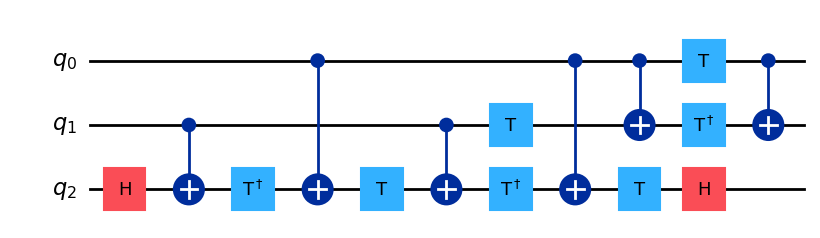

<IPython.core.display.Latex object>

In [48]:
def out_state(osv, ost):
  return "["+array_to_latex(osv).data.replace("\\begin{bmatrix}", "").replace("\\end{bmatrix}", "").replace(" & ", " ")[2:][:-7].strip()+"] = |"+ost+"\\rangle"

qc = QuantumCircuit(3)
qc.h(2)
qc.cx(1, 2)
qc.t(2).inverse()
qc.cx(0, 2)
qc.t(2)
qc.cx(1, 2)
qc.t(2).inverse()
qc.t(1)
qc.cx(0, 2)
qc.t(2)
qc.cx(0, 1)
qc.h(2)
qc.t(1).inverse()
qc.t(0)
qc.cx(0, 1)
display(qc.draw(output='mpl'))
display(Latex(rf"""
\begin{{array}}{{c c c | c}}
\textbf{{Input}} & & & \textbf{{Output State}} \\
q_2 & q_1 & q_0 & \ket{{\psi}} \\
\hline
0 & 0 & 0 & {out_state(Statevector.from_label('000').evolve(qc), "000")} \\
0 & 0 & 1 & {out_state(Statevector.from_label('001').evolve(qc), "001")} \\
0 & 1 & 0 & {out_state(Statevector.from_label('010').evolve(qc), "010")} \\
0 & 1 & 1 & {out_state(Statevector.from_label('011').evolve(qc), "111")} \\
1 & 0 & 0 & {out_state(Statevector.from_label('100').evolve(qc), "100")} \\
1 & 0 & 1 & {out_state(Statevector.from_label('101').evolve(qc), "101")} \\
1 & 1 & 0 & {out_state(Statevector.from_label('110').evolve(qc), "110")} \\
1 & 1 & 1 & {out_state(Statevector.from_label('111').evolve(qc), "011")} \\
\end{{array}}
"""))

# Exercise 2
![Ex2](res/ex2.png)

<!-- \\begin{array}{c c c | c}
    \\text{Input } \\ket{q_2 q_1 q_0} & & & & \\text{Output State} \\\\
    q_2 & q_1 & q_0 & \\ket{\\psi} \\\\
    \\hline
    0 & 0 & 0 &  \\\\
    0 & 0 & 1 &  \\\\
    0 & 1 & 0 &  \\\\
    0 & 1 & 1 &  \\\\
    1 & 0 & 0 &  \\\\
    1 & 0 & 1 &  \\\\
    1 & 1 & 0 &  \\\\
    1 & 1 & 1 &  \\\\
\\end{array} -->



<IPython.core.display.Latex object>

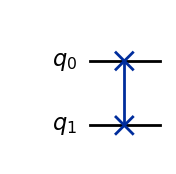

<IPython.core.display.Latex object>

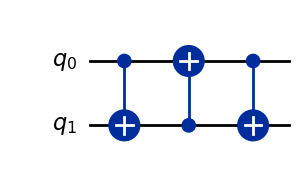

In [49]:
qc = QuantumCircuit(2)
qc.swap(0, 1)
display(hp.derive_unitary_matrix(qc))
display(qc.draw(output='mpl'))

qc = QuantumCircuit(2)
qc.cx(0, 1)
qc.cx(1, 0)
qc.cx(0, 1)
display(hp.derive_unitary_matrix(qc))
display(qc.draw(output='mpl'))

<IPython.core.display.Latex object>

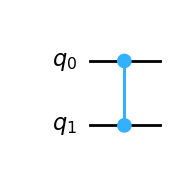

<IPython.core.display.Latex object>

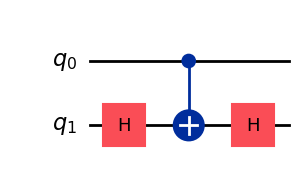

In [50]:
qc = QuantumCircuit(2)
qc.cz(0, 1)
display(hp.derive_unitary_matrix(qc))
display(qc.draw(output='mpl'))

qc = QuantumCircuit(2)
qc.h(1)
qc.cx(0, 1)
qc.h(1)
display(hp.derive_unitary_matrix(qc))
display(qc.draw(output='mpl'))

<IPython.core.display.Latex object>

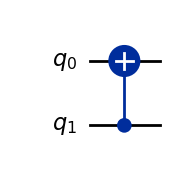

<IPython.core.display.Latex object>

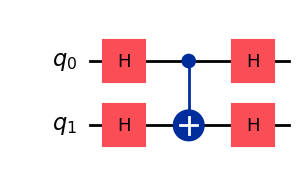

In [51]:
qc = QuantumCircuit(2)
qc.cx(1, 0)
display(hp.derive_unitary_matrix(qc))
display(qc.draw(output='mpl'))

qc = QuantumCircuit(2)
qc.h(0)
qc.h(1)
qc.cx(0, 1)
qc.h(0)
qc.h(1)
display(hp.derive_unitary_matrix(qc))
display(qc.draw(output='mpl'))

<IPython.core.display.Latex object>

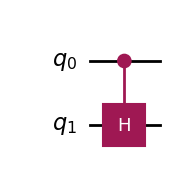

<IPython.core.display.Latex object>

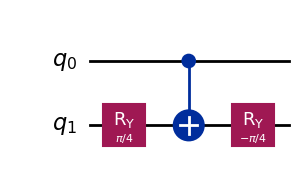

In [52]:
qc = QuantumCircuit(2)
qc.ch(0, 1)
display(hp.derive_unitary_matrix(qc))
display(qc.draw(output='mpl'))

qc = QuantumCircuit(2)
qc.ry(np.pi/4, 1)
qc.cx(0, 1)
qc.ry(-np.pi/4, 1)
display(hp.derive_unitary_matrix(qc))
display(qc.draw(output='mpl'))

<IPython.core.display.Latex object>

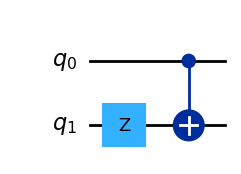

<IPython.core.display.Latex object>

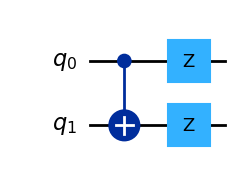

In [53]:
qc = QuantumCircuit(2)
qc.z(1)
qc.cx(0, 1)
display(hp.derive_unitary_matrix(qc))
display(qc.draw(output='mpl'))

qc = QuantumCircuit(2)
qc.cx(0, 1)
qc.z(0)
qc.z(1)
display(hp.derive_unitary_matrix(qc))
display(qc.draw(output='mpl'))

<IPython.core.display.Latex object>

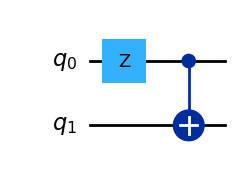

<IPython.core.display.Latex object>

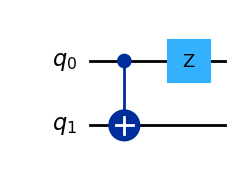

In [54]:
qc = QuantumCircuit(2)
qc.z(0)
qc.cx(0, 1)
display(hp.derive_unitary_matrix(qc))
display(qc.draw(output='mpl'))

qc = QuantumCircuit(2)
qc.cx(0, 1)
qc.z(0)
display(hp.derive_unitary_matrix(qc))
display(qc.draw(output='mpl'))

<IPython.core.display.Latex object>

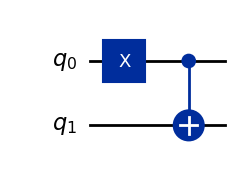

<IPython.core.display.Latex object>

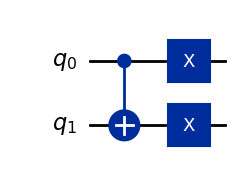

In [55]:
qc = QuantumCircuit(2)
qc.x(0)
qc.cx(0, 1)
display(hp.derive_unitary_matrix(qc))
display(qc.draw(output='mpl'))

qc = QuantumCircuit(2)
qc.cx(0, 1)
qc.x(0)
qc.x(1)
display(hp.derive_unitary_matrix(qc))
display(qc.draw(output='mpl'))

<IPython.core.display.Latex object>

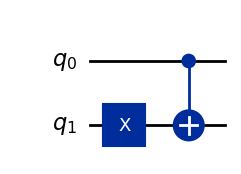

<IPython.core.display.Latex object>

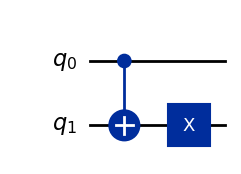

In [56]:
qc = QuantumCircuit(2)
qc.x(1)
qc.cx(0, 1)
display(hp.derive_unitary_matrix(qc))
display(qc.draw(output='mpl'))

qc = QuantumCircuit(2)
qc.cx(0, 1)
qc.x(1)
display(hp.derive_unitary_matrix(qc))
display(qc.draw(output='mpl'))